In [1]:
from sklearn import datasets
from typing import Tuple, Mapping

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.animation as animation
import numpy as np
import math

from IPython.display import HTML

In [2]:
def func_Shvefel(x: np.ndarray) -> np.float64:
    return x[0] * x[0] + (x[0] + x[1]) ** 2

def grad_Shvefel(x: np.ndarray) -> np.ndarray:
    return np.array([2 * x[0] + 2 * (x[0] + x[1]), 2 * (x[0] + x[1])])

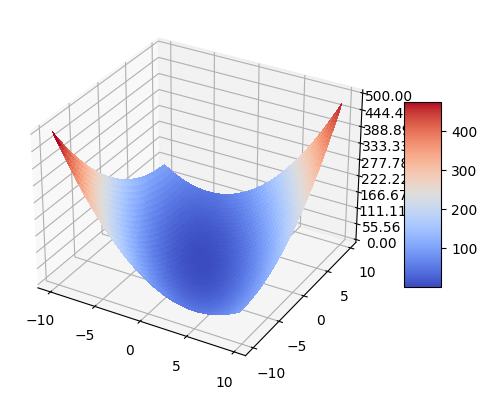

In [3]:
# Make data.
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
Z = func_Shvefel(np.array([X, Y]))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [21]:
def multi_func(x: np.ndarray) -> np.float64:
       return -x[0] * np.sin(4 * np.pi * x[0]) -x[1] * np.sin(4 * np.pi * x[1])

def grad_three_humped_func(x: np.ndarray) -> np.ndarray:
       return np.array([np.sin(4 * np.pi * x[0]) + x[0] * 4 * np.pi * np.cos(4 * np.pi * x[0]), np.sin(4 * np.pi * x[1]) + x[1] * 4 * np.pi * np.cos(4 * np.pi * x[1])])


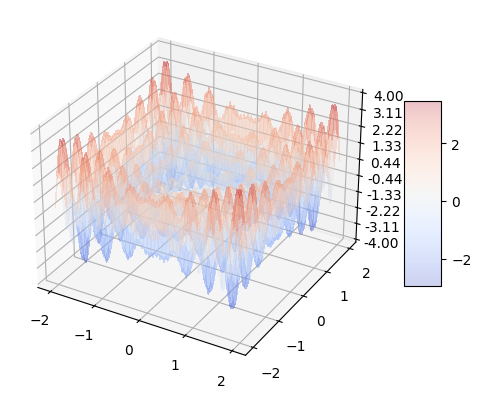

In [22]:
# Make data.
X = np.arange(-2, 2, 0.01)
Y = np.arange(-2, 2, 0.01)
X, Y = np.meshgrid(X, Y)
Z = multi_func(np.array([X, Y]))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.25)

# Customize the z axis.
ax.set_zlim(-4, 4)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()